# Analyse d'une base de données des emplyés

## Présentation de la base de données

__L'ensemble de données comprend 4 variables sur 74 employés. Les valeurs sont qualitatives et sont les suivantes:__

- Work_accident: 0 pas d'accident pendant le séjour du salarié, 1 - accident lors du séjour du salarié 
- left: 0 indique que l'employé reste dans l'entreprise, 1 indique - l'employé a quitté l'entreprise 
- sales: indique le département de l'employé (IT, support, marketing, product_mng, sales, hr, management, technical, accounting, RandD)
- salary: indique la catégorie du salaire (low, medium, high)

In [1]:
import pandas as pd
import numpy as np
from fanalysis.mca import MCA
import matplotlib.pyplot as plt

## Enoncé

__1. Extraire les statistiques sur le jeux de données__

__2. Analyse ACM:__
   - Effectuer une ACM sur le jeu de données. Justifier le nombre de composantes retournées par l'ACM.
   - Afficher les valeurs propres et les ratio de variance expliquée par chaque composante. 
   - Quelle est le nombre de facteurs à garder? justifier le choix.
   - Effectuer l'ACM avec le nombre de facteurs gardés. 
   - Afficher les coordonnées, les contributions et les qualités de représentation des points lignes sur chaque axe. 
   - Tracer le graphique des points lignes sur les deux premières composantes et interpréter le résultats.
   - Afficher les coordonnées, les contributions et les qualités de représentation des points colonnes sur chaque axe.
   - Tracer le graphique des points colonnes sur les deux premières composantes et interprétez le résultats.
   - Est-il intéressant de tracer les graphiques (points lignes et points colonnes) sur les autres dimensions ? Effectuer la démarche le cas échéant, et analyser.

In [2]:
data = pd.read_excel('ACM_data.xls')
data.index = [f'{i+1}' for i in range(len(data.index))]

In [3]:
data

Work accident  Left        sales  salary
1      Work Accident  Stay    technical     low
2   No Work Accident  Stay  product_mng  medium
3   No Work Accident  Stay    technical  medium
4      Work Accident  Left    technical     low
5      Work Accident  Stay   management     low
..               ...   ...          ...     ...
70     Work Accident  Stay    technical  medium
71     Work Accident  Stay        sales     low
72     Work Accident  Stay           IT    high
73     Work Accident  Stay        sales     low
74     Work Accident  Stay  product_mng     low

[74 rows x 4 columns]

In [5]:
data.describe()

Work accident  Left  sales salary
count              74    74     74     74
unique              2     2     10      3
top     Work Accident  Stay  sales    low
freq               65    59     21     38

In [6]:
X = data.values
X

array([['Work Accident', 'Stay', 'technical', 'low'],
       ['No Work Accident', 'Stay', 'product_mng', 'medium'],
       ['No Work Accident', 'Stay', 'technical', 'medium'],
       ['Work Accident', 'Left', 'technical', 'low'],
       ['Work Accident', 'Stay', 'management', 'low'],
       ['Work Accident', 'Stay', 'sales', 'medium'],
       ['Work Accident', 'Stay', 'sales', 'high'],
       ['Work Accident', 'Stay', 'product_mng', 'medium'],
       ['Work Accident', 'Stay', 'marketing', 'medium'],
       ['Work Accident', 'Stay', 'RandD', 'medium'],
       ['Work Accident', 'Stay', 'support', 'medium'],
       ['Work Accident', 'Left', 'product_mng', 'low'],
       ['Work Accident', 'Stay', 'support', 'low'],
       ['Work Accident', 'Stay', 'IT', 'medium'],
       ['No Work Accident', 'Stay', 'sales', 'medium'],
       ['Work Accident', 'Stay', 'management', 'high'],
       ['Work Accident', 'Stay', 'IT', 'medium'],
       ['Work Accident', 'Left', 'sales', 'low'],
       ['Work Acc

In [11]:
my_mca = MCA(row_labels=data.index.values, var_labels=data.columns.values) 

In [12]:
my_mca.fit(X) 

MCA(row_labels=array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74'], dtype=object),
    var_labels=array(['Work accident', ' Left', 'sales', 'salary'], dtype=object))

In [14]:
# Obtenir les valeurs propres
print(my_mca.eig_)
for i in range(len(my_mca.eig_[1])):
    print(f'La valeur propre en pourcentage de variance de laxe {i+1} est:{my_mca.eig_[1][i]}')
for i in range(len(my_mca.eig_[2])):
    print(f'La valeur propre en pourcentage cumule de variance de laxe {i+1} est:{my_mca.eig_[2][i]}')
    
# nbre des valeurs propres = nbre des modalites - nbre des variables
# = 17-4
# = 13

[[  0.41867368   0.39901338   0.301029     0.27856484   0.25
    0.25         0.25         0.25         0.25         0.20998899
    0.14898324   0.13799968   0.10574719]
 [ 12.88226714  12.27733473   9.26243076   8.57122597   7.69230769
    7.69230769   7.69230769   7.69230769   7.69230769   6.4611996
    4.58409959   4.24614404   3.2537597 ]
 [ 12.88226714  25.15960187  34.42203263  42.99325861  50.6855663
   58.37787399  66.07018168  73.76248937  81.45479707  87.91599667
   92.50009625  96.7462403  100.        ]]
La valeur propre en pourcentage de variance de laxe 1 est:12.882267137907004
La valeur propre en pourcentage de variance de laxe 2 est:12.277334731524283
La valeur propre en pourcentage de variance de laxe 3 est:9.26243076187403
La valeur propre en pourcentage de variance de laxe 4 est:8.571225974372688
La valeur propre en pourcentage de variance de laxe 5 est:7.692307692307698
La valeur propre en pourcentage de variance de laxe 6 est:7.692307692307694
La valeur propre en po

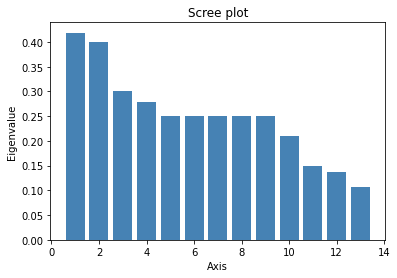

In [15]:
my_mca.plot_eigenvalues() 

In [17]:
print("La moyenne des valeurs propres : \n", np.average(my_mca.eig_[0]))
print("La moyenne des valeurs propres est aussi égale à 1/p : \n", 1/4)
print("On retient donc 4 facteurs")
# On retient les valeurs > moyenne des valeurs propres

La moyenne des valeurs propres : 
 0.25
La moyenne des valeurs propres est aussi égale à 1/p : 
 0.25
On retient donc 4 facteurs


In [19]:
#Instanciation
my_mca = MCA(row_labels=data.index.values, var_labels=data.columns.values[0:3],n_components=4)
#Calcul
my_mca.fit(X)

MCA(n_components=4,
    row_labels=array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74'], dtype=object),
    var_labels=array(['Work accident', ' Left', 'sales'], dtype=object))

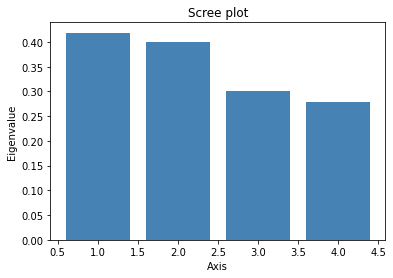

In [20]:
my_mca.plot_eigenvalues() 

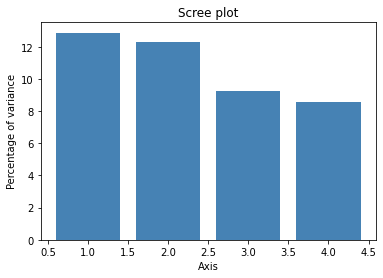

In [21]:
my_mca.plot_eigenvalues(type="percentage")

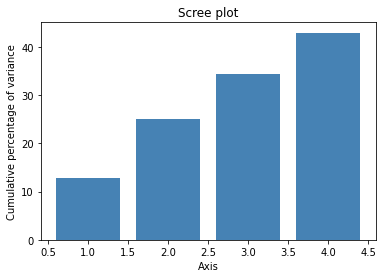

In [22]:
my_mca.plot_eigenvalues(type="cumulative") 
# On observe que les pourcentage des valeurs propres cumulees n'a pas atteint 50%

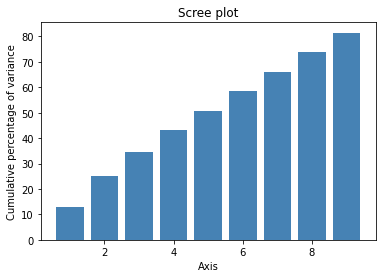

In [24]:
# On essaie de garder les valeurs propres >= moyenne des valeurs propres
my_mca = MCA(row_labels=data.index.values, var_labels=data.columns.values[0:3],n_components=9)
my_mca.fit(X)
my_mca.plot_eigenvalues(type="cumulative") 

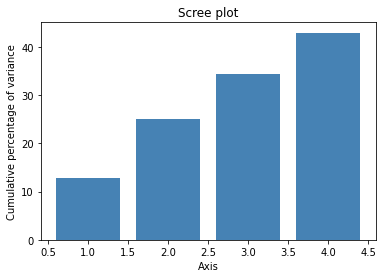

In [28]:
my_mca = MCA(row_labels=data.index.values, var_labels=data.columns.values[0:3],n_components=4)
my_mca.fit(X)
my_mca.plot_eigenvalues(type="cumulative") 

In [29]:
# Contribution de chaque ligne
data_rows = my_mca.row_topandas()
data_rows

row_coord_dim1  row_coord_dim2  row_coord_dim3  row_coord_dim4  \
1        -0.302886        0.039675        0.003860       -0.291732   
2         0.540536       -1.243149        0.757534       -0.744000   
3         0.417859       -0.950990        0.491827       -0.873193   
4        -1.012030        0.277302        0.016665       -0.650415   
5         0.514458        0.968120        0.070470        0.022530   
..             ...             ...             ...             ...   
70        0.142997       -0.301729       -0.273546       -0.643722   
71       -0.125739        0.014809        0.373874        0.649383   
72        0.722142        0.832384        0.111487        0.102018   
73       -0.125739        0.014809        0.373874        0.649383   
74       -0.180209       -0.252484        0.269567       -0.162538   

    row_contrib_dim1  row_contrib_dim2  row_contrib_dim3  row_contrib_dim4  \
1           0.296108          0.005331          0.000067          0.412867   
2           0.943064          5.233917          2.576109          2.685269   
3           0.563575          3.062900          1.085889          3.698817   
4           3.305819          0.260427          0.001247          2.052216   
5           0.854265          3.174237          0.022293          0.002462   
..               ...               ...               ...               ...   
70          0.066001          0.308328          0.335908          2.010197   
71          0.051031          0.000743          0.627497          2.045711   
72          1.683207          2.346543          0.055797          0.050489   
73          0.051031          0.000743          0.627497          2.045711   
74          0.104820          0.215898          0.326206          0.128161   

    row_cos2_dim1  row_cos2_dim2  row_cos2_dim3  row_cos2_dim4  
1        0.065228       0.001119       0.000011       0.060512  
2        0.067286       0.355896       0.132154       0.127474  
3        0.052102       0.269863       0.072180       0.227517  
4        0.440287       0.033056       0.000119       0.181857  
5        0.083535       0.295819       0.001567       0.000160  
..            ...            ...            ...            ...  
70       0.012939       0.057609       0.047350       0.262212  
71       0.016367       0.000227       0.144707       0.436555  
72       0.123483       0.164062       0.002943       0.002464  
73       0.016367       0.000227       0.144707       0.436555  
74       0.013545       0.026589       0.030309       0.011019  

[74 rows x 12 columns]

In [30]:
 # Coordonnées des points lignes
print(my_mca.row_coord_)

[[-0.30288574  0.03967467  0.00385989 -0.29173188]
 [ 0.54053568 -1.24314854  0.75753404 -0.74399996]
 [ 0.41785867 -0.95099003  0.49182732 -0.87319338]
 [-1.01202969  0.27730173  0.01666528 -0.65041504]
 [ 0.51445815  0.96812016  0.07047037  0.02253003]
 [ 0.32014391 -0.32659424  0.09646882  0.29739321]
 [ 0.63737866  0.78106242  0.46603049  0.28454901]
 [ 0.26567418 -0.59388707 -0.00783906 -0.51452855]
 [ 0.16382756 -0.3215703  -0.94526325 -0.01244413]
 [-0.09893718 -0.22190347 -0.92957929 -0.7972444 ]
 [ 0.47379703 -0.46214947 -1.05802284  0.55231163]
 [-0.88935268 -0.01485678  0.282372   -0.52122163]
 [ 0.02791412 -0.12074624 -0.78061717  0.90430171]
 [ 0.404907   -0.27527241 -0.25807472  0.11486221]
 [ 0.59500541 -0.97585571  0.86184191  0.0679218 ]
 [ 1.27757581  1.73437359  0.16262638 -0.34230426]
 [ 0.404907   -0.27527241 -0.25807472  0.11486221]
 [-0.83488295  0.25243605  0.38667987  0.29070014]
 [-0.56614678 -0.0641015  -0.26074039 -1.00240512]
 [-0.12573901  0.01480899  0.37

In [31]:
# Contributions des points lignes
print(my_mca.row_contrib_)

[[2.96108096e-01 5.33098477e-03 6.68820769e-05 4.12866610e-01]
 [9.43064385e-01 5.23391744e+00 2.57610908e+00 2.68526901e+00]
 [5.63574651e-01 3.06289952e+00 1.08588852e+00 3.69881695e+00]
 [3.30581941e+00 2.60426984e-01 1.24676613e-03 2.05221627e+00]
 [8.54265209e-01 3.17423700e+00 2.22932348e-02 2.46243872e-03]
 [3.30813405e-01 3.61241699e-01 4.17766712e-02 4.29046222e-01]
 [1.31125650e+00 2.06610462e+00 9.74964066e-01 3.92786110e-01]
 [2.27819716e-01 1.19450661e+00 2.75859495e-04 1.28428357e+00]
 [8.66296485e-02 3.50213335e-01 4.01111848e+00 7.51226353e-04]
 [3.15945145e-02 1.66766569e-01 3.87911651e+00 3.08336491e+00]
 [7.24564892e-01 7.23345431e-01 5.02516161e+00 1.47982498e+00]
 [2.55294029e+00 7.47532266e-04 3.57934194e-01 1.31791326e+00]
 [2.51501394e-03 4.93773826e-02 2.73549641e+00 3.96705921e+00]
 [5.29179710e-01 2.56629278e-01 2.98986009e-01 6.40024053e-02]
 [1.14270582e+00 3.22516576e+00 3.33438058e+00 2.23800145e-02]
 [5.26824522e+00 1.01874650e+01 1.18724935e-01 5.684163

In [32]:
# Cos2 des points lignes
print(my_mca.row_cos2_)

[[6.52281094e-02 1.11918981e-03 1.05931942e-05 6.05124748e-02]
 [6.72861972e-02 3.55896161e-01 1.32154380e-01 1.27474431e-01]
 [5.21015931e-02 2.69863468e-01 7.21800984e-02 2.27516572e-01]
 [4.40286972e-01 3.30563187e-02 1.19391767e-04 1.81857191e-01]
 [8.35347025e-02 2.95818517e-01 1.56740048e-03 1.60210246e-04]
 [8.99178811e-02 9.35777581e-02 8.16449770e-03 7.75921330e-02]
 [1.45525008e-01 2.18531518e-01 7.77985067e-02 2.90039230e-02]
 [2.74492769e-02 1.37163941e-01 2.38979260e-05 1.02955884e-01]
 [5.49551186e-03 2.11731791e-02 1.82953095e-01 3.17075770e-05]
 [1.02941215e-03 5.17843339e-03 9.08747235e-02 6.68425753e-02]
 [7.73615662e-02 7.36046930e-02 3.85771975e-01 1.05125716e-01]
 [2.38431973e-01 6.65373612e-05 2.40358617e-02 8.18957389e-02]
 [2.85642930e-04 5.34469520e-03 2.23383919e-01 2.99779830e-01]
 [6.37591891e-02 2.94684708e-02 2.59013942e-02 5.13081719e-03]
 [1.21627620e-01 3.27161059e-01 2.55179399e-01 1.58492522e-03]
 [3.26831665e-01 6.02332183e-01 5.29581443e-03 2.346255

In [33]:
data_cols = my_mca.col_topandas()
data_cols

col_coord_dim1  col_coord_dim2  col_coord_dim3  \
col0_No Work Accident        0.624875       -1.440970        1.475431   
col0_Work Accident          -0.086521        0.199519       -0.204290   
col1_Left                   -1.463364        0.478707        0.022407   
col1_Stay                    0.372042       -0.121705       -0.005697   
col2_IT                      0.258612       -0.027812        0.043917   
col2_RandD                  -1.045438        0.107036       -1.429797   
col2_accounting              1.169964       -1.120233       -2.989964   
col2_hr                     -2.354057        0.998534        0.084476   
col2_management              1.696186        2.251245        0.156150   
col2_marketing              -0.365350       -0.144793       -1.464217   
col2_product_mng            -0.101751       -0.832856        0.593095   
col2_sales                   0.039228       -0.157487        0.822014   
col2_support                 0.436913       -0.499994       -1.711685   
col2_technical              -0.419263       -0.094659        0.009964   
col3_high                    1.324915        2.053184        0.410744   
col3_low                    -0.650186        0.117091        0.208494   
col3_medium                  0.503848       -0.745533       -0.400312   

                       col_coord_dim4  col_contrib_dim1  col_contrib_dim2  \
col0_No Work Accident       -0.425533          2.835710         15.822435   
col0_Work Accident           0.058920          0.392637          2.190799   
col1_Left                   -0.603746         25.919637          2.910395   
col1_Stay                    0.153495          6.589738          0.739931   
col2_IT                      0.408745          0.431736          0.005239   
col2_RandD                  -1.516867          1.763840          0.019400   
col2_accounting             -1.455033          1.104531          1.062522   
col2_hr                      0.630428         13.414908          2.532605   
col2_management             -0.529295         13.929348         25.746462   
col2_marketing               0.139980          0.430835          0.071003   
col2_product_mng            -0.920006          0.066834          4.698402   
col2_sales                   0.794099          0.026076          0.440989   
col2_support                 1.332275          1.078251          1.481660   
col2_technical              -1.192755          1.985796          0.106211   
col3_high                   -0.405782         11.331795         28.553961   
col3_low                     0.364445         12.962580          0.441113   
col3_medium                 -0.378666          5.735747         13.176874   

                       col_contrib_dim3  col_contrib_dim4  col_cos2_dim1  \
col0_No Work Accident         21.987732          1.976475       0.054065   
col0_Work Accident             3.044455          0.273666       0.054065   
col1_Left                      0.008452          6.631047       0.544433   
col1_Stay                      0.002149          1.685859       0.544433   
col2_IT                        0.017316          1.620975       0.008107   
col2_RandD                     4.588582          5.580936       0.030359   
col2_accounting               10.033021          2.567602       0.018751   
col2_hr                        0.024026          1.446018       0.234151   
col2_management                0.164186          2.038584       0.253857   
col2_marketing                 9.624341          0.095054       0.007627   
col2_product_mng               3.158196          8.212081       0.001255   
col2_sales                    15.924940         16.060175       0.000610   
col2_support                  23.016826         15.068417       0.019944   
col2_technical                 0.001560         24.155310       0.041016   
col3_high                      1.514721          1.597563       0.212776   
col3_low                       1.853842          6.121096       0.446227   
col3_medium                  

In [34]:
# Coordonnées des points colonne
my_mca.col_coord_

array([[ 0.62487532, -1.44097016,  1.47543129, -0.42553312],
       [-0.0865212 ,  0.19951895, -0.20429049,  0.05891997],
       [-1.4633645 ,  0.47870714,  0.02240666, -0.60374622],
       [ 0.37204182, -0.12170521, -0.00569661,  0.1534948 ],
       [ 0.25861152, -0.02781179,  0.04391716,  0.40874479],
       [-1.04543795,  0.10703554, -1.42979658, -1.51686704],
       [ 1.1699643 , -1.12023343, -2.98996352, -1.45503307],
       [-2.35405662,  0.99853357,  0.08447607,  0.63042772],
       [ 1.69618593,  2.25124489,  0.15615001, -0.52929491],
       [-0.36535026, -0.14479267, -1.46421729,  0.13997951],
       [-0.10175086, -0.83285551,  0.59309544, -0.92000591],
       [ 0.03922769, -0.15748668,  0.82201413,  0.79409871],
       [ 0.4369127 , -0.4999941 , -1.71168451,  1.33227476],
       [-0.41926348, -0.09465855,  0.00996368, -1.19275513],
       [ 1.32491509,  2.05318354,  0.41074416, -0.40578224],
       [-0.650186  ,  0.1170908 ,  0.2084945 ,  0.36444485],
       [ 0.50384812, -0.

In [35]:
# Contributions des points colonnes
print(my_mca.col_contrib_)

[[2.83571039e+00 1.58224348e+01 2.19877324e+01 1.97647457e+00]
 [3.92636823e-01 2.19079866e+00 3.04445525e+00 2.73665710e-01]
 [2.59196370e+01 2.91039483e+00 8.45172809e-03 6.63104670e+00]
 [6.58973822e+00 7.39930888e-01 2.14874443e-03 1.68585933e+00]
 [4.31736080e-01 5.23924621e-03 1.73164325e-02 1.62097539e+00]
 [1.76383984e+00 1.94002272e-02 4.58858160e+00 5.58093558e+00]
 [1.10453085e+00 1.06252191e+00 1.00330212e+01 2.56760204e+00]
 [1.34149078e+01 2.53260479e+00 2.40263936e-02 1.44601848e+00]
 [1.39293480e+01 2.57464621e+01 1.64185657e-01 2.03858428e+00]
 [4.30835487e-01 7.10025539e-02 9.62434115e+00 9.50541112e-02]
 [6.68342047e-02 4.69840172e+00 3.15819624e+00 8.21208061e+00]
 [2.60757876e-02 4.40989001e-01 1.59249405e+01 1.60601746e+01]
 [1.07825131e+00 1.48166024e+00 2.30168259e+01 1.50684167e+01]
 [1.98579646e+00 1.06210765e-01 1.55979565e-03 2.41553095e+01]
 [1.13317949e+01 2.85539612e+01 1.51472134e+00 1.59756321e+00]
 [1.29625802e+01 4.41113146e-01 1.85384214e+00 6.121096

In [36]:
# Cos2 des points colonnes
print(my_mca.col_cos2_)

[[5.40649606e-02 2.87500846e-01 3.01416576e-01 2.50723991e-02]
 [5.40649606e-02 2.87500846e-01 3.01416576e-01 2.50723991e-02]
 [5.44432793e-01 5.82611519e-02 1.27641986e-04 9.26719052e-02]
 [5.44432793e-01 5.82611519e-02 1.27641986e-04 9.26719052e-02]
 [8.10665669e-03 9.37570731e-05 2.33783865e-04 2.02511878e-02]
 [3.03594588e-02 3.18239064e-04 5.67866187e-02 6.39134897e-02]
 [1.87509106e-02 1.71907253e-02 1.22464135e-01 2.90016609e-02]
 [2.34151377e-01 4.21296881e-02 3.01529831e-04 1.67932020e-02]
 [2.53857062e-01 4.47185606e-01 2.15142569e-03 2.47193915e-02]
 [7.62747513e-03 1.19799526e-03 1.22510416e-01 1.11967217e-03]
 [1.25493786e-03 8.40785822e-02 4.26378427e-02 1.02595257e-01]
 [6.09717890e-04 9.82722856e-03 2.67733056e-01 2.49857511e-01]
 [1.99440138e-02 2.61187864e-02 3.06105178e-01 1.85443167e-01]
 [4.10157687e-02 2.09072281e-03 2.31641571e-05 3.31955122e-01]
 [2.12775757e-01 5.10977289e-01 2.04497901e-02 1.99586945e-02]
 [4.46227499e-01 1.44719372e-02 4.58849535e-02 1.401989

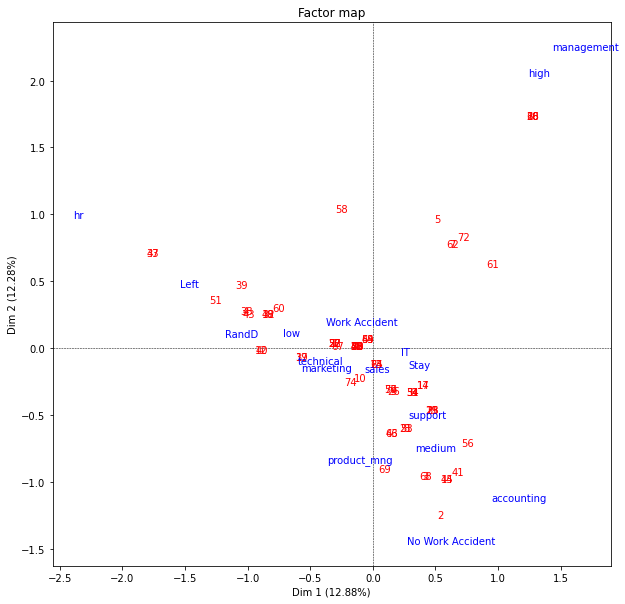

In [37]:
# Representation graphique sur 1er et 2eme axe
my_mca.mapping(num_x_axis=1, num_y_axis=2,figsize=(10,10)) 

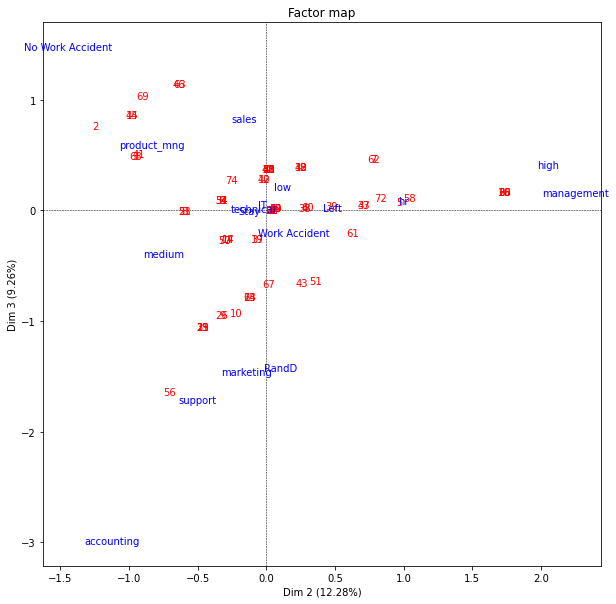

In [38]:
# Representation graphique sur 3eme et 4eme axe
my_mca.mapping(num_x_axis=2, num_y_axis=3,figsize=(10,10)) 

In [39]:
# Il n'est pas tres interessant d'etudier sur differentes axes
# Regroupement des variables sur les deux graphes sont presque identique
# eg au milieu on a toujours work accident, IT, technical, et high management, accounting est un peu loin de tous

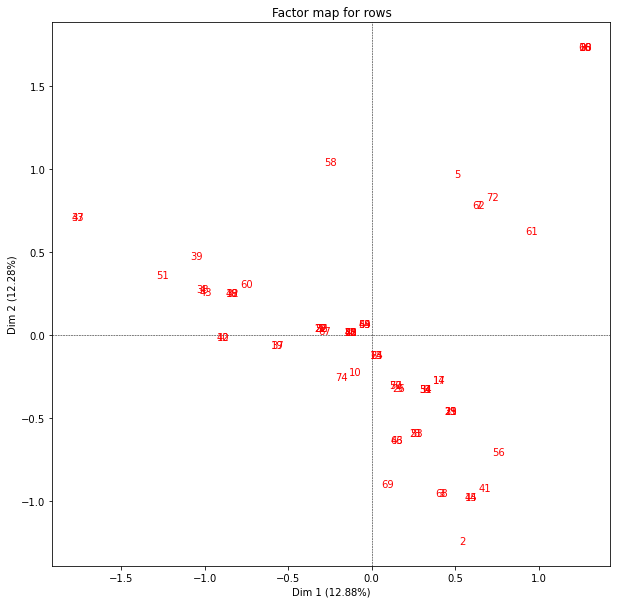

In [40]:
# Mapping des points lignes
my_mca.mapping_row(num_x_axis=1, num_y_axis=2,figsize=(10,10))

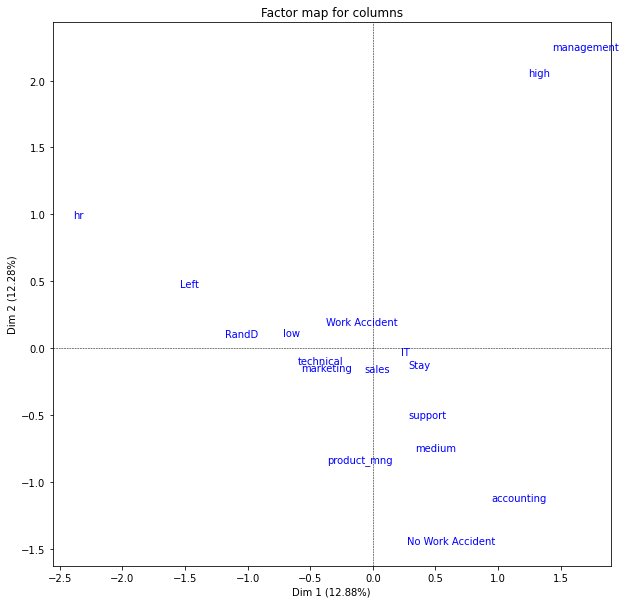

In [41]:
# Mapping des points colonnes
my_mca.mapping_col(num_x_axis=1, num_y_axis=2,figsize=(10,10))